In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
results = model.train(data="./datasets/yolo/data.yaml", time=1, patience=5, batch=32, single_cls=True, imgsz=320, 
                      cache=True, verbose=True, device="mps")


image 1/1 /Users/bhavyemathur/Desktop/Academics/College/UMich/MRover/keyboard-detection/datasets/test/7.jpg: 480x640 79 keys, 72.0ms
Speed: 1.1ms preprocess, 72.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


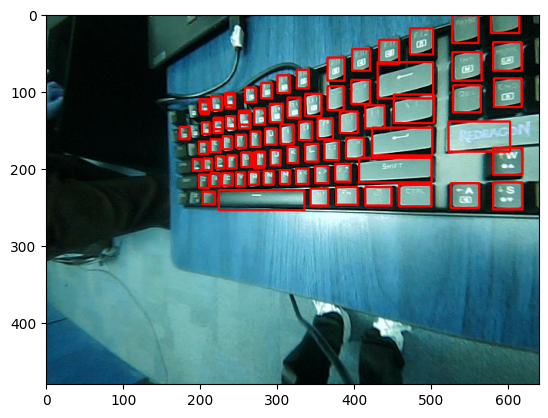

In [48]:
import cv2
import matplotlib.pyplot as plt

results = model(f"datasets/test/7.jpg")[0]
img = results.orig_img.copy()

THRESHOLD = 0.0

for box in results.boxes:  # results.xyxy[0] is the detections tensor
    if box.conf < THRESHOLD:
        continue
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    color = (255, 0, 0)  # Color for the bounding box (BGR)
    cv2.rectangle(img, (x1, y1), (x2, y2), color, thickness=2)  # Draw
        
plt.imshow(img)
plt.show()